# Read Data

In [2]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('NEAR_USDT_futures_data_2020.csv')

# Display the first few rows of the DataFrame
df

,coin,opentime,openprice,highprice,lowprice,closeprice,volume,closetime,quotevolume,trades,taker_buy_volume,taker_buy_quote,unused
0,NEAR,1602748800000,1.0625,1.1872,1.0625,1.1169,1449407,1602752399999,1.655530e+06,9968,766784,8.779915e+05,0
1,NEAR,1602752400000,1.1169,1.1301,1.0778,1.1179,1616432,1602755999999,1.789316e+06,8743,873713,9.684362e+05,0
2,NEAR,1602756000000,1.1176,1.1650,1.1136,1.1570,1270406,1602759599999,1.441663e+06,8310,721173,8.190750e+05,0
3,NEAR,1602759600000,1.1572,1.1575,1.1210,1.1279,481575,1602763199999,5.503787e+05,4446,227307,2.600841e+05,0
4,NEAR,1602763200000,1.1286,1.1812,1.1025,1.1536,1835160,1602766799999,2.107977e+06,9266,934671,1.074642e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36456,NEAR,1733990400000,7.0790,7.1800,7.0780,7.1800,1252786,1733993999999,8.950482e+06,20675,658195,4.702462e+06,0
36457,NEAR,1733994000000,7.1790,7.2200,7.1460,7.1490,1535789,1733997599999,1.103534e+07,23363,709728,5.101661e+06,0
36458,NEAR,1733997600000,7.1490,7.1560,7.0210,7.0380,2065246,1734001199999,1.461731e+07,35347,875286,6.193253e+06,0
36459,NEAR,1734001200000,7.0380,7.0510,6.9450,7.0070,1712135,1734004799999,1.197202e+07,32840,797708,5.579540e+06,0


# Statistics

## 4h

In [5]:
df_volatility = df[['highprice','lowprice']]

df_volatility['volatility'] = (df_volatility['highprice'] - df_volatility['lowprice']) / df_volatility['lowprice']
df_volatility['4h_avg_volatility'] = df_volatility['volatility'].rolling(window=4).mean()

df_volatility.dropna(inplace=True)

df_volatility

/tmp/ipykernel_332315/1093950641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volatility['volatility'] = (df_volatility['highprice'] - df_volatility['lowprice']) / df_volatility['lowprice']
/tmp/ipykernel_332315/1093950641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volatility['4h_avg_volatility'] = df_volatility['volatility'].rolling(window=4).mean()
/tmp/ipykernel_332315/1093950641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

,highprice,lowprice,volatility,4h_avg_volatility
3,1.1575,1.1210,0.032560,0.061152
4,1.1812,1.1025,0.071383,0.049656
5,1.2231,1.1521,0.061627,0.052932
6,1.2208,1.1631,0.049609,0.053795
7,1.1890,1.1672,0.018677,0.050324
...,...,...,...,...
36456,7.1800,7.0780,0.014411,0.015098
36457,7.2200,7.1460,0.010355,0.012596
36458,7.1560,7.0210,0.019228,0.013723
36459,7.0510,6.9450,0.015263,0.014814


In [6]:
# Calculate summary statistics for volatility and 4h_avg_volatility
summary_stats = {
    'Metric': ['Mean', 'Median', 'Max', 'Min'],
    'Volatility': [
        df_volatility['volatility'].mean(),
        df_volatility['volatility'].median(),
        df_volatility['volatility'].max(),
        df_volatility['volatility'].min()
    ],
    '4h_avg_volatility': [
        df_volatility['4h_avg_volatility'].mean(),
        df_volatility['4h_avg_volatility'].median(),
        df_volatility['4h_avg_volatility'].max(),
        df_volatility['4h_avg_volatility'].min()
    ]
}

# Convert the summary stats dictionary to a DataFrame
summary_df = pd.DataFrame(summary_stats)

summary_df

,Metric,Volatility,4h_avg_volatility
0,Mean,0.020231,0.020233
1,Median,0.016030,0.017219
2,Max,0.900972,0.346912
3,Min,0.000268,0.002243


## 10h

In [12]:
df_volatility = df[['highprice','lowprice']]

df_volatility['volatility'] = (df_volatility['highprice'] - df_volatility['lowprice']) / df_volatility['lowprice']
df_volatility['10h_avg_volatility'] = df_volatility['volatility'].rolling(window=10).mean()

df_volatility.dropna(inplace=True)

df_volatility

/tmp/ipykernel_332315/72602448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volatility['volatility'] = (df_volatility['highprice'] - df_volatility['lowprice']) / df_volatility['lowprice']
/tmp/ipykernel_332315/72602448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_volatility['10h_avg_volatility'] = df_volatility['volatility'].rolling(window=10).mean()
/tmp/ipykernel_332315/72602448.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

,highprice,lowprice,volatility,10h_avg_volatility
9,1.1670,1.1255,0.036873,0.054354
10,1.1549,1.1267,0.025029,0.045121
11,1.1615,1.1412,0.017788,0.042047
12,1.1676,1.1424,0.022059,0.039637
13,1.1469,1.1276,0.017116,0.038093
...,...,...,...,...
36456,7.1800,7.0780,0.014411,0.017125
36457,7.2200,7.1460,0.010355,0.017017
36458,7.1560,7.0210,0.019228,0.017420
36459,7.0510,6.9450,0.015263,0.017177


In [14]:
# Calculate summary statistics for volatility and 4h_avg_volatility
summary_stats = {
    'Metric': ['Mean', 'Median', 'Max', 'Min'],
    'Volatility': [
        df_volatility['volatility'].mean(),
        df_volatility['volatility'].median(),
        df_volatility['volatility'].max(),
        df_volatility['volatility'].min()
    ],
    '10h_avg_volatility': [
        df_volatility['10h_avg_volatility'].mean(),
        df_volatility['10h_avg_volatility'].median(),
        df_volatility['10h_avg_volatility'].max(),
        df_volatility['10h_avg_volatility'].min()
    ]
}

# Convert the summary stats dictionary to a DataFrame
summary_df = pd.DataFrame(summary_stats)

summary_df

,Metric,Volatility,10h_avg_volatility
0,Mean,0.020226,0.020230
1,Median,0.016028,0.017808
2,Max,0.900972,0.192171
3,Min,0.000268,0.003215


# Eval

In [25]:
import numpy as np
import polars as pl
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust the evaluate_baseline function to accept only y_pred and y_test
def evaluate_baseline(y_pred, y_test):
    # Convert lists to Numpy arrays
    pred = np.array(y_pred)
    test = np.array(y_test)

    # Evaluation Metrics
    me = np.mean(pred - test)  # Mean Error
    mae = mean_absolute_error(test, pred)  # Mean Absolute Error
    mape = np.mean(np.abs((test - pred) / test)) * 100  # Mean Absolute Percentage Error
    mpe = np.mean((test - pred) / test) * 100  # Mean Percentage Error
    rmse = np.sqrt(mean_squared_error(test, pred))  # Root Mean Squared Error

    r = r2_score(test, pred)  # Coefficient of Determination (R-squared)
    min_max_error = np.abs((np.min(pred) - np.min(test)) + 
                            (np.max(pred) - np.max(test)))  # Min-Max Error

    df = pl.DataFrame({
        f'volatility_prediction': pred,
        f'volatility_actual': test
    })

    df = df.with_columns(
        abs(pl.col(f'volatility_prediction') - pl.col(f'volatility_actual')).alias(f'dif_volatility')
    )

    # overall median abs error
    median_abs_err =  df[f'dif_volatility'].median()

    # overall var abs error
    var_abs_err =  df[f'dif_volatility'].var()

    # Results
    results = {
        "Overall Median Absolute Error" : median_abs_err,
        "Overall Variance Absolute Error" : var_abs_err,
        "Mean Error": me,
        "Mean Absolute Error ": mae,
        "Mean Absolute Percentage Error": mape,
        "Mean Percentage Error": mpe,
        "Root Mean Squared Error": rmse,
        "R-squared": r, 
        "Min-Max Error": min_max_error
    }
    
    return results, df

# 4 Hours Agg Base Model

## Data Manipulation

In [33]:
df_m = df.copy()

# Calculate Volatility
df_m.drop(columns=['coin','unused', 'closetime'], inplace=True)

df_m

,opentime,openprice,highprice,lowprice,closeprice,volume,quotevolume,trades,taker_buy_volume,taker_buy_quote
0,1602748800000,1.0625,1.1872,1.0625,1.1169,1449407,1.655530e+06,9968,766784,8.779915e+05
1,1602752400000,1.1169,1.1301,1.0778,1.1179,1616432,1.789316e+06,8743,873713,9.684362e+05
2,1602756000000,1.1176,1.1650,1.1136,1.1570,1270406,1.441663e+06,8310,721173,8.190750e+05
3,1602759600000,1.1572,1.1575,1.1210,1.1279,481575,5.503787e+05,4446,227307,2.600841e+05
4,1602763200000,1.1286,1.1812,1.1025,1.1536,1835160,2.107977e+06,9266,934671,1.074642e+06
...,...,...,...,...,...,...,...,...,...,...
36456,1733990400000,7.0790,7.1800,7.0780,7.1800,1252786,8.950482e+06,20675,658195,4.702462e+06
36457,1733994000000,7.1790,7.2200,7.1460,7.1490,1535789,1.103534e+07,23363,709728,5.101661e+06
36458,1733997600000,7.1490,7.1560,7.0210,7.0380,2065246,1.461731e+07,35347,875286,6.193253e+06
36459,1734001200000,7.0380,7.0510,6.9450,7.0070,1712135,1.197202e+07,32840,797708,5.579540e+06


In [34]:
import pandas as pd

df_m['volatility'] = (df_m['highprice'] - df_m['lowprice']) / df_m['lowprice']

# Example: Assuming your DataFrame is named `df_m`
df_m['opentime'] = pd.to_datetime(df_m['opentime'], unit='ms')  # Convert 'opentime' to datetime

# Step 1: Drop initial rows to align with 4-hour intervals
start_time = df_m['opentime'].iloc[0]
start_offset = (start_time.hour % 4) * 3600000 + start_time.minute * 60000 + start_time.second * 1000 + start_time.microsecond // 1000
if start_offset != 0:
    df_m = df_m.iloc[(4 - start_time.hour % 4):]

# Step 2: Set 'opentime' as index
df_m.set_index('opentime', inplace=True)

# Step 3: Aggregate the data every 4 hours
agg_dict = {
    'openprice': 'first',
    'highprice': 'max',
    'lowprice': 'min',
    'closeprice': 'last',
    'volume': 'sum',
    'quotevolume': 'sum',
    'trades': 'sum',
    'taker_buy_volume': 'sum',
    'taker_buy_quote': 'sum',
    'volatility' : 'mean'
}

df_agg = df_m.resample('4h').agg(agg_dict).dropna().reset_index()

# Display the result
df_agg['next_volatility'] = df_agg['volatility'].shift(-1)

df_agg.dropna(inplace=True)

df_agg


,opentime,openprice,highprice,lowprice,closeprice,volume,quotevolume,trades,taker_buy_volume,taker_buy_quote,volatility,next_volatility
0,2020-10-15 08:00:00,1.0625,1.1872,1.0625,1.1279,4817820,5.436888e+06,31467,2588977,2.925587e+06,0.061152,0.050324
1,2020-10-15 12:00:00,1.1286,1.2231,1.1025,1.1777,7234110,8.514717e+06,44982,3741813,4.409185e+06,0.050324,0.035115
2,2020-10-15 16:00:00,1.1772,1.1800,1.1124,1.1609,3082573,3.527578e+06,15450,1317154,1.509746e+06,0.035115,0.018301
3,2020-10-15 20:00:00,1.1614,1.1676,1.1143,1.1220,1350979,1.536829e+06,7032,614980,7.007536e+05,0.018301,0.028176
4,2020-10-16 00:00:00,1.1210,1.1585,1.1000,1.1082,1678252,1.900205e+06,8564,702786,7.972310e+05,0.028176,0.081511
...,...,...,...,...,...,...,...,...,...,...,...,...
9110,2024-12-11 16:00:00,6.8760,6.9250,6.7410,6.8520,5710584,3.899074e+07,103733,2551115,1.742565e+07,0.013953,0.009367
9111,2024-12-11 20:00:00,6.8510,6.9060,6.8250,6.8450,3149226,2.162340e+07,63129,1365533,9.378979e+06,0.009367,0.021838
9112,2024-12-12 00:00:00,6.8450,7.1500,6.7750,7.0540,7133997,4.963662e+07,137048,3651954,2.542302e+07,0.021838,0.014514
9113,2024-12-12 04:00:00,7.0530,7.2150,7.0400,7.0800,6015021,4.283726e+07,108737,2932569,2.090040e+07,0.014514,0.014814


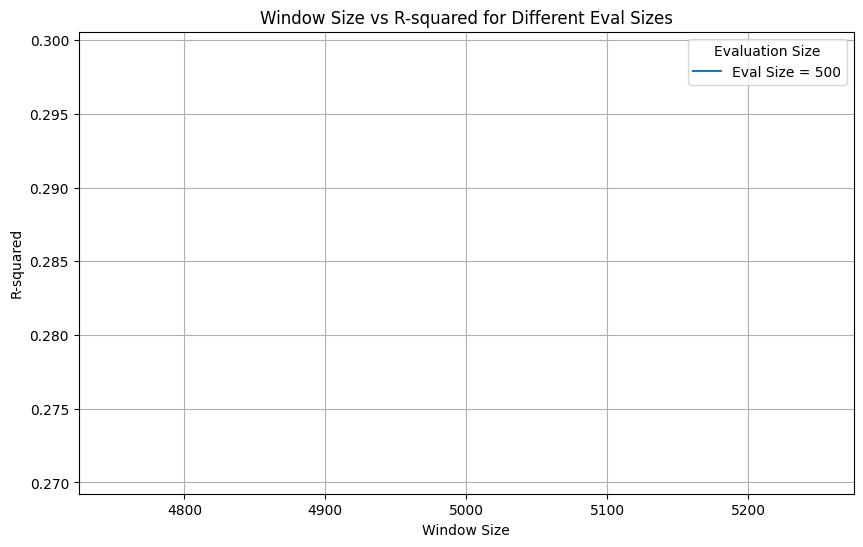

In [42]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Plot different eval_size with different lines
for eval_size in results_df['eval_size'].unique():
    subset = results_df[results_df['eval_size'] == eval_size]
    plt.plot(subset['window_size'], subset['R-squared'], label=f'Eval Size = {eval_size}')

# Labels and title
plt.xlabel('Window Size')
plt.ylabel('R-squared')
plt.title('Window Size vs R-squared for Different Eval Sizes')
plt.legend(title='Evaluation Size')

# Show the plot
plt.grid(True)
plt.show()

# 4 Hours Non-agg Base Model

In [3]:
df_m = df.copy()

# Calculate Volatility
df_m.drop(columns=['coin','unused', 'closetime'], inplace=True)

df_m

,opentime,openprice,highprice,lowprice,closeprice,volume,quotevolume,trades,taker_buy_volume,taker_buy_quote
0,1602748800000,1.0625,1.1872,1.0625,1.1169,1449407,1.655530e+06,9968,766784,8.779915e+05
1,1602752400000,1.1169,1.1301,1.0778,1.1179,1616432,1.789316e+06,8743,873713,9.684362e+05
2,1602756000000,1.1176,1.1650,1.1136,1.1570,1270406,1.441663e+06,8310,721173,8.190750e+05
3,1602759600000,1.1572,1.1575,1.1210,1.1279,481575,5.503787e+05,4446,227307,2.600841e+05
4,1602763200000,1.1286,1.1812,1.1025,1.1536,1835160,2.107977e+06,9266,934671,1.074642e+06
...,...,...,...,...,...,...,...,...,...,...
36456,1733990400000,7.0790,7.1800,7.0780,7.1800,1252786,8.950482e+06,20675,658195,4.702462e+06
36457,1733994000000,7.1790,7.2200,7.1460,7.1490,1535789,1.103534e+07,23363,709728,5.101661e+06
36458,1733997600000,7.1490,7.1560,7.0210,7.0380,2065246,1.461731e+07,35347,875286,6.193253e+06
36459,1734001200000,7.0380,7.0510,6.9450,7.0070,1712135,1.197202e+07,32840,797708,5.579540e+06


In [5]:
df_m['volatility'] = (df_m['highprice'] - df_m['lowprice']) / df_m['highprice']

df_m['next_4h_avg_volatility'] = (df_m['volatility'].shift(-1) + df_m['volatility'].shift(-2) + df_m['volatility'].shift(-3) + df_m['volatility'].shift(-4)) / 4

df_m.dropna(inplace=True)

df_m

,opentime,openprice,highprice,lowprice,closeprice,volume,quotevolume,trades,taker_buy_volume,taker_buy_quote,volatility,next_4h_avg_volatility
0,1602748800000,1.0625,1.1872,1.0625,1.1169,1449407,1.655530e+06,9968,766784,8.779915e+05,0.105037,0.047140
1,1602752400000,1.1169,1.1301,1.0778,1.1179,1616432,1.789316e+06,8743,873713,9.684362e+05,0.046279,0.050083
2,1602756000000,1.1176,1.1650,1.1136,1.1570,1270406,1.441663e+06,8310,721173,8.190750e+05,0.044120,0.050868
3,1602759600000,1.1572,1.1575,1.1210,1.1279,481575,5.503787e+05,4446,227307,2.600841e+05,0.031533,0.047569
4,1602763200000,1.1286,1.1812,1.1025,1.1536,1835160,2.107977e+06,9266,934671,1.074642e+06,0.066627,0.045234
...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1733976000000,7.0530,7.1250,7.0400,7.0810,1549828,1.097683e+07,29710,682310,4.834212e+06,0.011930,0.014863
36453,1733979600000,7.0820,7.2150,7.0710,7.1270,2039678,1.460077e+07,34191,1225453,8.771590e+06,0.019958,0.012436
36454,1733983200000,7.1270,7.1680,7.0640,7.1220,1633077,1.162963e+07,26984,677472,4.826473e+06,0.014509,0.013525
36455,1733986800000,7.1210,7.1440,7.0670,7.0800,792438,5.630026e+06,17852,347334,2.468128e+06,0.010778,0.014589


In [9]:
import time
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Separate df into features and target
features_df = df_m.drop(['opentime', 'next_4h_avg_volatility'], axis=1)
target_df = df_m['next_4h_avg_volatility']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Specify parameters for the sliding window approach
num_predictions = 1   # Number of rows to predict
gap = 1               # Gap (number of rows to skip after each window)
max_windows = [500]    # Maximum number of windows to process
set_limit = True      # Set this to False to process all windows

# Define list of window sizes
window_sizes = [5000]

# List to store results
all_results = []

# Loop through each evaluation size
for max_window in max_windows:
# Loop through each window size
    for window_size in window_sizes:
        print(f'Processing window size: {window_size}')

        # Calculate the number of windows based on dataset size
        num_windows = len(X) - window_size - num_predictions

        # Adjust the starting point if set_limit is True
        start_index = 0
        if set_limit:
            # Only process the latest max_window
            start_index = max(0, len(X) - window_size - num_predictions - max_window)
            num_windows = min(num_windows, max_window)

        # Initialize lists to store actual and predicted values for this window size
        y_vals = []
        y_preds = []

        # Loop through each sliding window with the gap applied
        for window_number in range(start_index, start_index + num_windows, gap):
            
            start = window_number
            end = start + window_size
            X_train = X[start:end]
            y_train = y[start:end]

            X_train_mean = np.mean(X_train, axis=0)
            X_train_std = np.std(X_train, axis=0)
            X_train_normalized = (X_train - X_train_mean) / X_train_std

            # Get the column index for 'cur_avg_vol_4h' from features_df
            close_index = features_df.columns.get_loc('volatility')

            # Normalize y_train using the mean and std of cur_avg_vol_4h
            close_mean = X_train[:, close_index].mean()
            close_std = X_train[:, close_index].std()
            y_train_normalized = (y_train - close_mean) / close_std

            # Prepare validation data for prediction
            X_val = X[end:end + num_predictions]
            y_val = y[end:end + num_predictions]

            # Normalize validation data using the statistics from the training set
            X_val_normalized = (X_val - X_train_mean) / X_train_std

            # Track the start time of the window processing
            start_time = time.time()

            # Initialize and fit the model
            model = LinearRegression()
            model.fit(X_train_normalized, y_train_normalized)

            # Predict on validation data
            y_pred_val = model.predict(X_val_normalized)
            # Denormalize y_val and y_pred_val using the mean and std of cur_avg_vol_4h
            y_pred_val_denorm = y_pred_val * close_std + close_mean

            # Track the end time of the window processing
            end_time = time.time()

            # Append actual and predicted values to the lists
            y_vals.append(y_val[0])  # Assuming a single prediction per window
            y_preds.append(y_pred_val_denorm[0])  # Assuming a single prediction per window

        # Now that all windows for this window_size are processed, evaluate the baseline
        eval_results, _ = evaluate_baseline(y_preds, y_vals)

        # Append the window size and evaluation metrics to the results list
        all_results.append({
            'eval_size' : max_window,
            'window_size': window_size,
            **eval_results
        })

# Convert the results to a DataFrame for further analysis
results_df = pd.DataFrame(all_results)

# Print the results DataFrame
results_df

Processing window size: 5000


,eval_size,window_size,Overall Median Absolute Error,Overall Variance Absolute Error,Mean Error,Mean Absolute Error,Mean Absolute Percentage Error,Mean Percentage Error,Root Mean Squared Error,R-squared,Min-Max Error
0,500,5000,0.004115,0.00005,-0.003325,0.006292,26.029595,4.978274,0.009459,0.089848,0.036882


# 10 Hours Non-agg Base Model

In [15]:
df_m = df.copy()

# Calculate Volatility
df_m.drop(columns=['coin','unused', 'closetime'], inplace=True)

df_m

,opentime,openprice,highprice,lowprice,closeprice,volume,quotevolume,trades,taker_buy_volume,taker_buy_quote
0,1602748800000,1.0625,1.1872,1.0625,1.1169,1449407,1.655530e+06,9968,766784,8.779915e+05
1,1602752400000,1.1169,1.1301,1.0778,1.1179,1616432,1.789316e+06,8743,873713,9.684362e+05
2,1602756000000,1.1176,1.1650,1.1136,1.1570,1270406,1.441663e+06,8310,721173,8.190750e+05
3,1602759600000,1.1572,1.1575,1.1210,1.1279,481575,5.503787e+05,4446,227307,2.600841e+05
4,1602763200000,1.1286,1.1812,1.1025,1.1536,1835160,2.107977e+06,9266,934671,1.074642e+06
...,...,...,...,...,...,...,...,...,...,...
36456,1733990400000,7.0790,7.1800,7.0780,7.1800,1252786,8.950482e+06,20675,658195,4.702462e+06
36457,1733994000000,7.1790,7.2200,7.1460,7.1490,1535789,1.103534e+07,23363,709728,5.101661e+06
36458,1733997600000,7.1490,7.1560,7.0210,7.0380,2065246,1.461731e+07,35347,875286,6.193253e+06
36459,1734001200000,7.0380,7.0510,6.9450,7.0070,1712135,1.197202e+07,32840,797708,5.579540e+06


In [27]:
df_m['volatility'] = (df_m['highprice'] - df_m['lowprice']) / df_m['highprice']

# Initialize the new column with zeros or NaN
df_m['next_10h_avg_volatility'] = 0

# Use a for loop to calculate the sum of shifts for the next 10 periods
for i in range(1, 11):  # Loop through shifts from -1 to -10
    df_m['next_10h_avg_volatility'] += df_m['volatility'].shift(-i)

# Divide the summed values by 10 to get the average
df_m['next_10h_avg_volatility'] /= 10

df_m.dropna(inplace=True)

df_m

,opentime,openprice,highprice,lowprice,closeprice,volume,quotevolume,trades,taker_buy_volume,taker_buy_quote,volatility,next_10h_avg_volatility
0,1602748800000,1.0625,1.1872,1.0625,1.1169,1449407,1.655530e+06,9968,766784,8.779915e+05,0.105037,0.042948
1,1602752400000,1.1169,1.1301,1.0778,1.1179,1616432,1.789316e+06,8743,873713,9.684362e+05,0.046279,0.040067
2,1602756000000,1.1176,1.1650,1.1136,1.1570,1270406,1.441663e+06,8310,721173,8.190750e+05,0.044120,0.037814
3,1602759600000,1.1572,1.1575,1.1210,1.1279,481575,5.503787e+05,4446,227307,2.600841e+05,0.031533,0.036343
4,1602763200000,1.1286,1.1812,1.1025,1.1536,1835160,2.107977e+06,9266,934671,1.074642e+06,0.066627,0.031668
...,...,...,...,...,...,...,...,...,...,...,...,...
36426,1733882400000,6.1670,6.4360,6.1450,6.4070,1842808,1.159954e+07,43108,985495,6.194625e+06,0.045214,0.016956
36427,1733886000000,6.4060,6.5010,6.3920,6.4390,1486724,9.601557e+06,30974,813831,5.257918e+06,0.016767,0.017972
36428,1733889600000,6.4400,6.4710,6.3770,6.4330,750535,4.821506e+06,21899,392378,2.521880e+06,0.014526,0.018845
36429,1733893200000,6.4340,6.4610,6.3740,6.4100,735627,4.713947e+06,18913,336143,2.154630e+06,0.013465,0.019306


In [28]:
# df_m.to_csv('NEAR_USDT_10h_avg_volatility_base.csv', index=False)

# print("DataFrame has been saved to csv")

DataFrame has been saved to csv


In [26]:
import time
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Separate df into features and target
features_df = df_m.drop(['opentime', 'next_10h_avg_volatility'], axis=1)
target_df = df_m['next_10h_avg_volatility']

# Convert to NumPy arrays
X = features_df.values
y = target_df.values

# Define list of train-test split proportions
train_test_ratios = [0.93]  # Example proportions for training set

# List to store results
all_results = []

# Loop through each train-test ratio
for train_ratio in train_test_ratios:
    print(f'Processing train-test split ratio: {train_ratio}')

    # Split data chronologically
    split_index = int(len(X) * train_ratio)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Normalize training data
    X_train_mean = np.mean(X_train, axis=0)
    X_train_std = np.std(X_train, axis=0)
    X_train_normalized = (X_train - X_train_mean) / X_train_std

    # Get the column index for 'volatility' from features_df
    close_index = features_df.columns.get_loc('volatility')

    # Normalize y_train using the mean and std of the 'volatility' column
    close_mean = X_train[:, close_index].mean()
    close_std = X_train[:, close_index].std()
    y_train_normalized = (y_train - close_mean) / close_std

    # Normalize test data using the training set's statistics
    X_test_normalized = (X_test - X_train_mean) / X_train_std

    # Initialize and fit the model
    start_time = time.time()
    model = LinearRegression()
    model.fit(X_train_normalized, y_train_normalized)

    # Predict on the test set
    y_pred_test = model.predict(X_test_normalized)
    # Denormalize predictions
    y_pred_test_denorm = y_pred_test * close_std + close_mean

    # Track the end time of the process
    end_time = time.time()

    # Evaluate the model
    eval_results, _ = evaluate_baseline(y_pred_test_denorm, y_test)

    # Append results to the list
    all_results.append({
        'train_ratio': train_ratio,
        **eval_results
    })

# Convert results to a DataFrame for further analysis
results_df = pd.DataFrame(all_results)

# Print the results DataFrame
results_df

Processing train-test split ratio: 0.93


,train_ratio,Overall Median Absolute Error,Overall Variance Absolute Error,Mean Error,Mean Absolute Error,Mean Absolute Percentage Error,Mean Percentage Error,Root Mean Squared Error,R-squared,Min-Max Error
0,0.93,0.004657,0.000014,0.002493,0.005202,35.802624,-26.449633,0.006438,0.179367,0.003324
